# Velocity Made Good Calculator

For a given **True Wind Angle (TWA)**, the component of motion towards the goal is **Velocity Made Good**. 

In this case, VMG is calculated as progress to windward, without taking into account any **lateral motion** made to gain the VMG component, or **leeway**, which acts directly against VMG.



In [2]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [3]:
def calculate_vmg_target_speed(min_twa, max_twa, log=True, target_speed=100):
    twa_dist = {}
    distance = 100
    for twa_deg in range(min_twa, max_twa+1):
        twa_rad = np.deg2rad(twa_deg)
        prev_distance = distance
        distance = round(np.abs(np.cos(twa_rad)**-1)*100, 2)
        extra = round(distance - prev_distance, 2)
        if log==True:
            print(f"TWA {twa_deg}: {distance}% distance required (+{extra})")
        twa_dist[twa_deg] = distance
        
    for twa_deg in twa_dist:
        req_speed = round((twa_dist[twa_deg]/100) * target_speed, 2)
        
    return twa_dist

#### Distance Sailed

Given totally equal VMG at any given TWA, how far would a boat need to sail?

TWA 25: 110.34% distance required (+10.34)
TWA 26: 111.26% distance required (+0.92)
TWA 27: 112.23% distance required (+0.97)
TWA 28: 113.26% distance required (+1.03)
TWA 29: 114.34% distance required (+1.08)
TWA 30: 115.47% distance required (+1.13)
TWA 31: 116.66% distance required (+1.19)
TWA 32: 117.92% distance required (+1.26)
TWA 33: 119.24% distance required (+1.32)
TWA 34: 120.62% distance required (+1.38)
TWA 35: 122.08% distance required (+1.46)
TWA 36: 123.61% distance required (+1.53)
TWA 37: 125.21% distance required (+1.6)
TWA 38: 126.9% distance required (+1.69)
TWA 39: 128.68% distance required (+1.78)
TWA 40: 130.54% distance required (+1.86)
TWA 41: 132.5% distance required (+1.96)
TWA 42: 134.56% distance required (+2.06)
TWA 43: 136.73% distance required (+2.17)
TWA 44: 139.02% distance required (+2.29)
TWA 45: 141.42% distance required (+2.4)
TWA 46: 143.96% distance required (+2.54)
TWA 47: 146.63% distance required (+2.67)
TWA 48: 149.45% distance required (+2

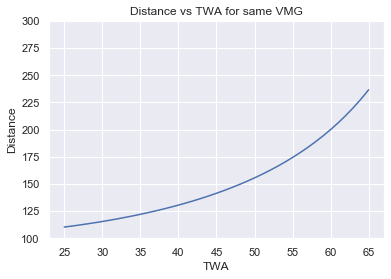

In [4]:
# -- NB: Too many graphs causes jupyter to hang --
min_twa = 25
max_twa = 65

twa_dist = calculate_vmg_target_speed(min_twa, max_twa)
twa = list(twa_dist.keys())
distance = list(twa_dist.values())

fig, ax = plt.subplots()
plt.ylim([100, 300])
ax.plot(twa, distance)
ax.set_title("Distance vs TWA for same VMG")
ax.set_ylabel('Distance')
ax.set_xlabel('TWA')
print()

**Distance vs TWA**

As can be seen, increasing the TWA sailed results in larger and larger distances sailed to make the same VMG.

Specifically, bearing off from 40º to 45º will only be an increase in VMG if speed increases by > 8.3%. Reducing from 40º to 50º would require a > 19% increase in speed.

#### Polar Diagram

an example polar __.figaro3.csv__ appears as:
```
TWA\TWS;0;4;6;8;10;12;14;16;20;25;30;35;40;50;60;70
0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
10;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
30;0;1.29;1.93;2.84;3.71;4.62;5.01;5.11;5.01;5.04;4.93;4.83;4.48;2.21;1.36;0.08
36;0;2.52;3.46;4.8;5.38;6;6.36;6.71;6.6;6.27;6.16;6.04;5.83;2.93;1.94;0.19
40;0;2.99;3.87;5.18;5.71;6.28;6.6;7;6.89;6.65;6.52;6.29;6.14;3.36;2.19;0.44
44;0;3.15;4.24;5.52;6.04;6.46;6.75;7.21;7.12;6.89;6.77;6.49;6.36;3.8;2.41;0.69
45;0;3.18;4.31;5.56;6.11;6.51;6.79;7.25;7.15;6.92;6.85;6.57;6.38;3.9;2.48;0.83
50;0;3.35;4.66;5.8;6.38;6.72;6.99;7.32;7.33;7.23;7.14;6.88;6.61;4.3;2.73;1.04
```

* **Rows** are different true wind angles (only 0–50 shown)
* **Columns** are a given wind speed (from 0–70kts)

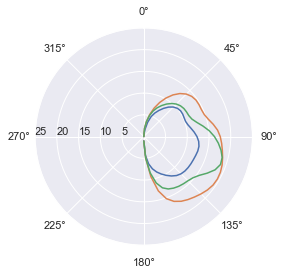

In [9]:
# Polar Diagram

# csv_path = 'boat_figaro3.csv'
csv_path = 'boat_Imoca2015.csv'
polar_data = pd.read_csv(csv_path, delimiter=';', header=0)
polar_data.add_suffix('_kts')    
polar_data.head()

twa_tws = polar_data.loc[:,'TWA\TWS']
ten_kts = polar_data.loc[:,'10']
twenty_kts = polar_data.loc[:,'20']
thirty_kts = polar_data.loc[:,'30']

theta = np.deg2rad(twa_tws)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# blue
ax.plot(theta, ten_kts)
# orange
ax.plot(theta, twenty_kts)
# green
ax.plot(theta, thirty_kts)

# ax.set_rmax(20)
# Fewer radial ticks
ax.set_rticks([5, 10, 15, 20, 25])  
# Move radial labels away from plotted line
ax.set_rlabel_position(270)  
ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

### Calculate VMG from real polar

Given defined boatspeeds for a given TWA, the VMG can be calculated

In [75]:
# def calculate_vmg(polar):
#     twa_dist = {}
    
   
    
#     for (twa_deg, speeds) in polar[1:].iteritems():
#         #print('Colunm Name : ', columnName)
#         #print('Column Values : ', columnData.values)
#         twa_rad = np.deg2rad(float(twa_deg))
#         twa_dist[twa_deg] = []
#         for speed in speeds.values:  
#             vmg = np.abs(np.cos(twa_rad)**-1)*speed
#             vmg_rounded = round(vmg, 2)
#             twa_dist[twa_deg].append(vmg_rounded)
#     return twa_dist

# # calculate_vmg(theta, ten_kts)
# calculate_vmg(polar_data)

# for (columnName, columnData) in df.iteritems():
#     print('Colunm Name : ', columnName)
#     print('Column Values : ', columnData.values)


max vmg up 4.37 at 40
max vmg down 5.53 at 146


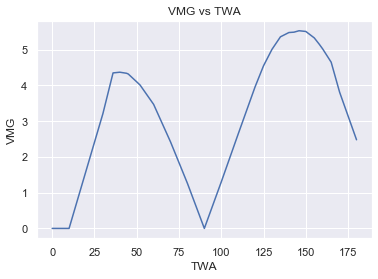

In [117]:
twa_dist = {}
for twa_deg, speed in zip(twa_tws, ten_kts):
    #print(f"twa_deg: {twa_deg}, speed: {speed}")
    twa_rad = np.deg2rad(float(twa_deg))
    #print(f"rads: {twa_rad}")
    vmg = speed / np.abs(np.cos(twa_rad)**-1) 
    vmg_rounded = round(vmg, 2)
    twa_dist[twa_deg] = vmg_rounded


twa = list(twa_dist.keys())
distance = list(twa_dist.values())

fig, ax = plt.subplots()
ax.plot(twa, distance)
ax.set_title("VMG vs TWA")
ax.set_ylabel('VMG')
ax.set_xlabel('TWA')
print()


# 90 degrees is elem 12
upwind_twas = list(twa_dist.keys())[:12]
upwind_vmgs = list(twa_dist.values())[:12]
downwind_twas = list(twa_dist.keys())[12:]
downwind_vmgs = list(twa_dist.values())[12:]

max_vmg_up = max(upwind_vmgs)
max_vmg_up_twa = upwind_twas[upwind_vmgs.index(max(upwind_vmgs))]
max_vmg_down = max(downwind_vmgs)
max_vmg_down_twa = downwind_twas[downwind_vmgs.index(max(downwind_vmgs))]

print(f"max vmg up {max_vmg_up} at {max_vmg_up_twa}")
print(f"max vmg down {max_vmg_down} at {max_vmg_down_twa}")

The chart above shows VMG vs TWA at 10kts of windspeed for a **Figaro 3**

The best upwind angle is 40º, the best downwind is 146º, which sounds reasonable.

# Components of Boatspeed

**(Both Positive and Negative)**

- A) Sea State
    - Current
    - Tide
    - Swell
    - Wind Waves
- B) Drag
    - Hydrodynamic
    - Aerodynamic
- C) Wind
    - Strength (including Gust/Lull)
    - Direction (including Oscillation range & timing)
    - Gradient
    